In [6]:
import pandas as pd

# Load the uploaded dataset to check its structure
file_path = 'SpirometerTesting/SpirometerObservations.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Age,Height (m),Height (in),Sex,Ethnicity,morning/afternoon/evening/night,FEV1 (litres),FVC (litres),FER (%),PEF (litre/min),Device,IAQ Index,PM2.5
0,36,1.5,59,female,Asian -PK,afternoon,2.37,2.37,100.0,327,SP80B,2,1
1,36,1.5,59,female,Asian -PK,afternoon,2.32,2.37,97.6,305,SP80B,2,1
2,36,1.5,59,female,Asian -PK,afternoon,1.98,1.98,100.0,250,MicroPlus,2,1
3,36,1.5,59,female,Asian -PK,afternoon,2.17,2.17,100.0,304,MicroPlus,2,1
4,36,1.5,59,female,Asian -PK,evening,2.14,2.14,100.0,325,SP80B,2,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              31 non-null     int64  
 1   Height (m)                       31 non-null     float64
 2   Height (in)                      31 non-null     int64  
 3   Sex                              31 non-null     object 
 4   Ethnicity                        31 non-null     object 
 5   morning/afternoon/evening/night  31 non-null     object 
 6   FEV1 (litres)                    31 non-null     float64
 7   FVC (litres)                     31 non-null     float64
 8   FER (%)                          31 non-null     float64
 9   PEF (litre/min)                  31 non-null     int64  
 10  Device                           31 non-null     object 
 11  IAQ Index                        31 non-null     int64  
 12  PM2.5                   

In [10]:
# 1. Descriptive Statistics for continuous variables
descriptive_stats = data[["Age", "Height (m)", "FEV1 (litres)", "FVC (litres)", "FER (%)", "PEF (litre/min)", "PM2.5"]].describe()

# 2. ANOVA to check if time of the test impacts PEF
from scipy.stats import f_oneway

# Group PEF by test time
pef_by_time = data.groupby("morning/afternoon/evening/night")["PEF (litre/min)"]
anova_result = f_oneway(*[group for _, group in pef_by_time])

# 3. Correlation matrix for continuous variables
correlation_matrix = data[["FEV1 (litres)", "PM2.5", "Age", "Height (m)", "FVC (litres)", "FER (%)", "PEF (litre/min)"]].corr()

# Display results
descriptive_stats, anova_result.pvalue, correlation_matrix


(             Age  Height (m)  FEV1 (litres)  FVC (litres)     FER (%)  \
 count  31.000000   31.000000      31.000000     31.000000   31.000000   
 mean   24.774194    1.383871       1.681613      1.783548   94.577419   
 std    15.198047    0.249128       0.659950      0.752213    7.570500   
 min     5.000000    1.000000       0.590000      0.680000   67.500000   
 25%     7.000000    1.200000       1.125000      1.190000   90.000000   
 50%    36.000000    1.500000       1.940000      1.940000   98.000000   
 75%    36.000000    1.500000       2.155000      2.170000  100.000000   
 max    38.000000    1.700000       2.730000      3.630000  100.000000   
 
        PEF (litre/min)  PM2.5  
 count        31.000000   31.0  
 mean        212.806452    1.0  
 std         111.122581    0.0  
 min          55.000000    1.0  
 25%         105.000000    1.0  
 50%         250.000000    1.0  
 75%         296.000000    1.0  
 max         459.000000    1.0  ,
 0.03281565533329114,
            

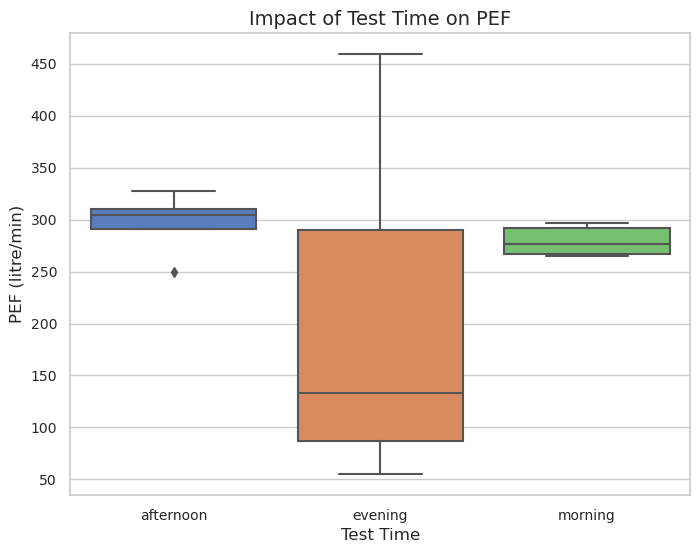

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


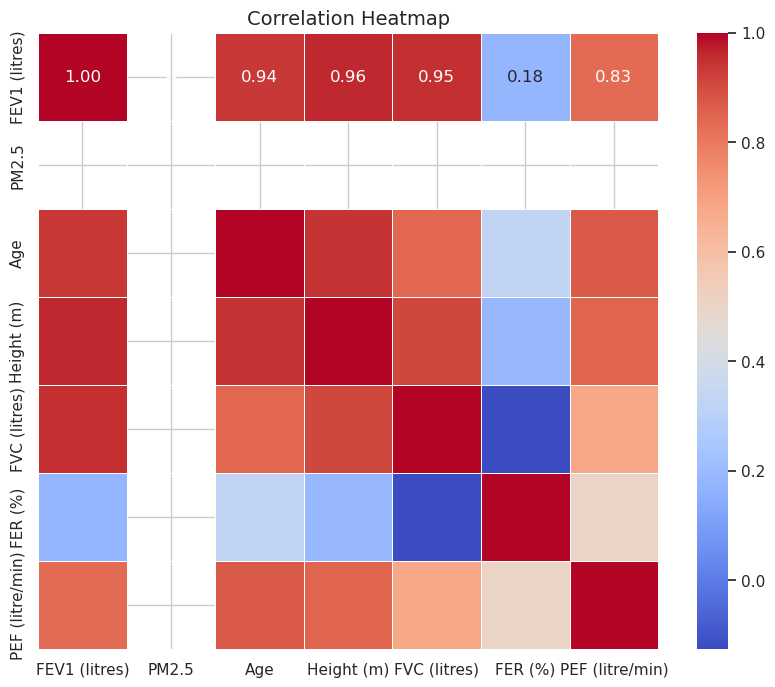

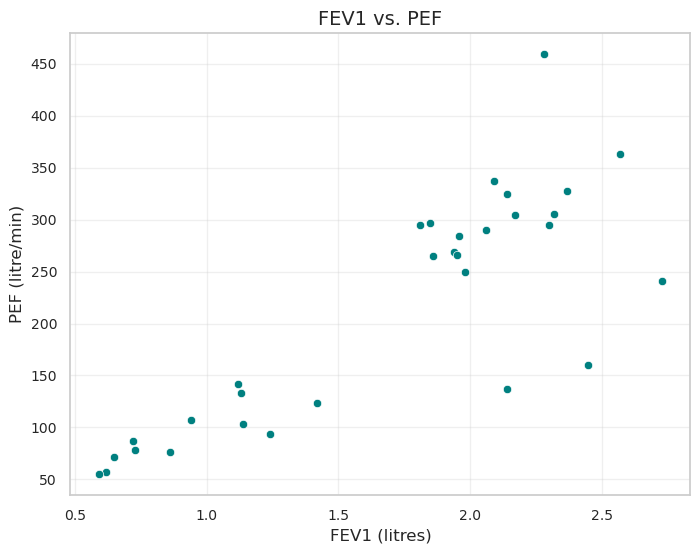

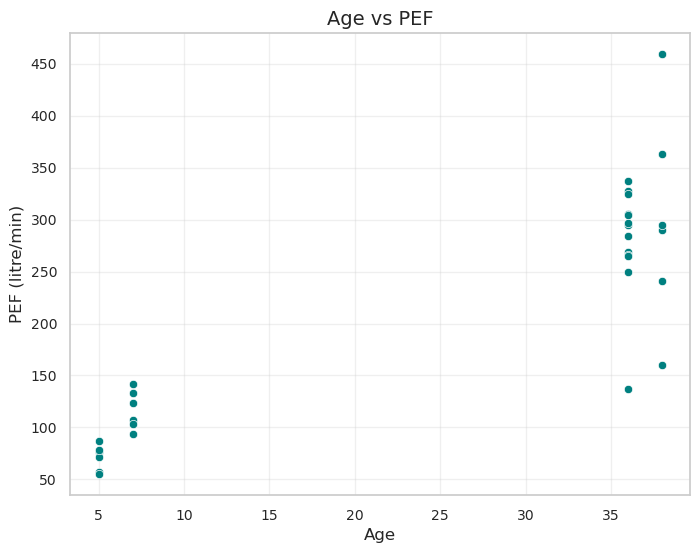

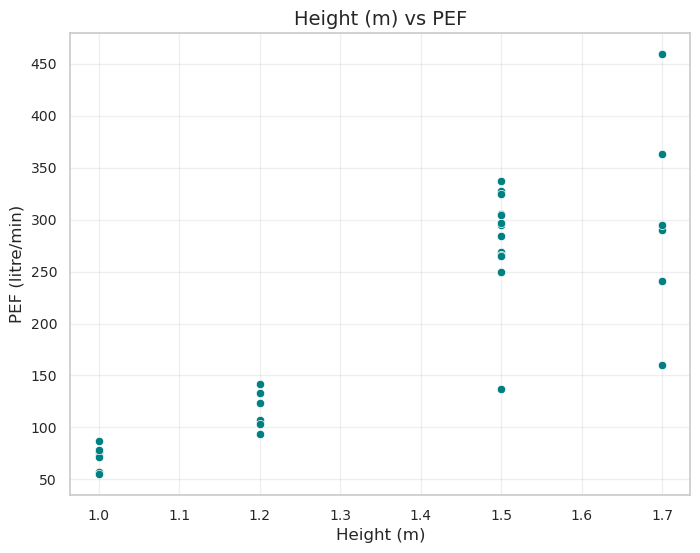

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visual style
sns.set_theme(style="whitegrid")

# 1. Box Plot: Impact of test time on PEF
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="morning/afternoon/evening/night", y="PEF (litre/min)", palette="muted")
plt.title("Impact of Test Time on PEF", fontsize=14)
plt.xlabel("Test Time", fontsize=12)
plt.ylabel("PEF (litre/min)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_data = data[["FEV1 (litres)", "PM2.5", "Age", "Height (m)", "FVC (litres)", "FER (%)", "PEF (litre/min)"]]
sns.heatmap(correlation_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# 3. Scatter Plots

# Scatter Plot: FEV1 vs. PEF
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="FEV1 (litres)", y="PEF (litre/min)", color="teal", edgecolor="w")
plt.title("FEV1 vs. PEF", fontsize=14)
plt.xlabel("FEV1 (litres)", fontsize=12)
plt.ylabel("PEF (litre/min)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# Scatter Plot: AGE vs. PEF
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Age", y="PEF (litre/min)", color="teal", edgecolor="w")
plt.title("Age vs PEF", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("PEF (litre/min)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# Scatter Plot: Height (m) vs. PEF
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Height (m)", y="PEF (litre/min)", color="teal", edgecolor="w")
plt.title("Height (m) vs PEF", fontsize=14)
plt.xlabel("Height (m)", fontsize=12)
plt.ylabel("PEF (litre/min)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()


